In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./dataset/train_label_balanced.csv")
df.shape

C:\Users\kjpb767\AppData\Local\Temp\ipykernel_47032\2652454371.py:1: DtypeWarning: Columns (6,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/train_label_balanced.csv")


(13550, 81)

In [3]:
#df = df.loc[df['SalePrice_label'].between(6, 8)]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_label
0,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,1
1,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,1
2,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,1
3,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,1
4,969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,1


<AxesSubplot:ylabel='Frequency'>

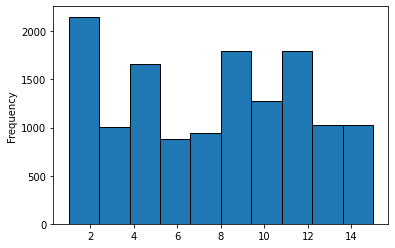

In [4]:
df['SalePrice_label'].plot(kind='hist', edgecolor='black') # 

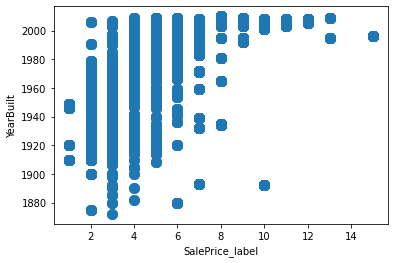

In [5]:
df.plot.scatter(x = 'SalePrice_label', y = 'YearBuilt', s = 100);

In [6]:
# Outilers
'''
df.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 6)].index, inplace=True)
df.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 7)].index, inplace=True)
df.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 10)].index, inplace=True)
df.plot.scatter(x = 'SalePrice_label', y = 'YearBuilt', s = 100);
'''

"\ndf.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 6)].index, inplace=True)\ndf.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 7)].index, inplace=True)\ndf.drop(df[(df['YearBuilt'] < 1900) & (df['SalePrice_label'] == 10)].index, inplace=True)\ndf.plot.scatter(x = 'SalePrice_label', y = 'YearBuilt', s = 100);\n"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               13550 non-null  int64  
 1   MSSubClass       13550 non-null  int64  
 2   MSZoning         13550 non-null  object 
 3   LotFrontage      12326 non-null  float64
 4   LotArea          13550 non-null  int64  
 5   Street           13550 non-null  object 
 6   Alley            524 non-null    object 
 7   LotShape         13550 non-null  object 
 8   LandContour      13550 non-null  object 
 9   Utilities        13550 non-null  object 
 10  LotConfig        13550 non-null  object 
 11  LandSlope        13550 non-null  object 
 12  Neighborhood     13550 non-null  object 
 13  Condition1       13550 non-null  object 
 14  Condition2       13550 non-null  object 
 15  BldgType         13550 non-null  object 
 16  HouseStyle       13550 non-null  object 
 17  OverallQual 

In [8]:
df_num = df.select_dtypes(include='number')

In [9]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               13550 non-null  int64  
 1   MSSubClass       13550 non-null  int64  
 2   LotFrontage      12326 non-null  float64
 3   LotArea          13550 non-null  int64  
 4   OverallQual      13550 non-null  int64  
 5   OverallCond      13550 non-null  int64  
 6   YearBuilt        13550 non-null  int64  
 7   YearRemodAdd     13550 non-null  int64  
 8   MasVnrArea       13272 non-null  float64
 9   BsmtFinSF1       13550 non-null  int64  
 10  BsmtFinSF2       13550 non-null  int64  
 11  BsmtUnfSF        13550 non-null  int64  
 12  TotalBsmtSF      13550 non-null  int64  
 13  1stFlrSF         13550 non-null  int64  
 14  2ndFlrSF         13550 non-null  int64  
 15  LowQualFinSF     13550 non-null  int64  
 16  GrLivArea        13550 non-null  int64  
 17  BsmtFullBath

In [10]:
#df_num = df_num.dropna()
#df_num.shape

df_num.fillna(df_num.mean(), inplace=True)
df_num.shape

(13550, 38)

In [11]:
df_num = df_num[['LotArea', 'YearBuilt', 'GrLivArea', 'GarageCars','SalePrice_label']]
df_num.head()

,LotArea,YearBuilt,GrLivArea,GarageCars,SalePrice_label
0,8500,1920,1317,1,1
1,7879,1920,720,0,1
2,5000,1946,334,0,1
3,9000,1949,480,1,1
4,5925,1910,968,0,1


### Discrétiser YearBuilt

<AxesSubplot:ylabel='Frequency'>

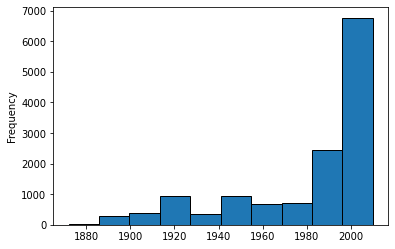

In [12]:
df_num['YearBuilt'].plot(kind='hist', edgecolor='black') #(kind='kde')

In [13]:
df_num_YearBuilt = pd.cut(x      = df_num['YearBuilt'],
                  bins   = [1800, 1910, 1950, 1994, 1996, 2003, 2006, 2008, 2009, 2050],
                  labels = ['ancien+++', 'ancien++', 'ancien+', 'ancien', 'recent', 'recent+', 'recent++', 'recent+++', 'top'])


pd.crosstab(df_num['SalePrice_label'], df_num_YearBuilt)

YearBuilt,ancien+++,ancien++,ancien+,ancien,recent,recent+,recent++,recent+++,top
SalePrice_label,,,,,,,,,
1,256,1024,0,0,0,0,0,0,0
2,72,496,296,0,0,8,0,0,0
3,52,312,582,4,12,36,4,0,0
4,12,84,414,22,126,130,24,8,0
5,4,76,216,28,268,148,72,28,0
6,16,32,240,48,192,240,88,24,0
7,16,32,208,32,160,288,208,0,0
8,0,64,64,32,96,256,288,64,32
9,0,0,128,128,64,384,128,64,0


### Discrétiser GrLivArea

<AxesSubplot:ylabel='Frequency'>

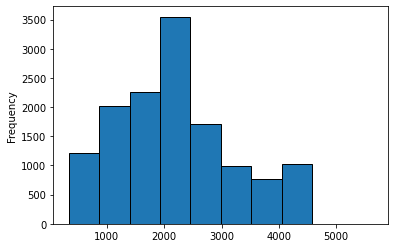

In [14]:
df_num['GrLivArea'].plot(kind='hist', edgecolor='black')

In [15]:
df_num_GrLivArea = pd.cut(x      = df_num['GrLivArea'],
                  bins   = [0, 1000, 2000, 3000, 6000],
                  labels = ['petit', 'moyen', 'moyen+', 'moyen++'])


pd.crosstab(df_num['SalePrice_label'], df_num_GrLivArea)

GrLivArea,petit,moyen,moyen+,moyen++
SalePrice_label,,,,
1,1024,256,0,0
2,480,384,8,0
3,320,648,34,0
4,14,764,36,6
5,0,632,196,12
6,0,496,376,8
7,0,400,528,16
8,0,448,384,64
9,0,64,704,128


### Discrétiser LotArea

<AxesSubplot:ylabel='Frequency'>

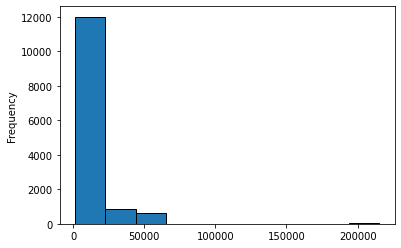

In [16]:
df_num['LotArea'].plot(kind='hist', edgecolor='black')

In [17]:
df_num_LotArea = pd.cut(x      = df_num['LotArea'],
                  bins   = [0, 25000, 300000],
                  labels = ['petit', 'moyen'])


pd.crosstab(df_num['SalePrice_label'], df_num_LotArea)

LotArea,petit,moyen
SalePrice_label,,
1,1280,0
2,872,0
3,994,8
4,804,16
5,804,36
6,856,24
7,912,32
8,832,64
9,832,64


### Discrétiser GarageCars

<AxesSubplot:ylabel='Frequency'>

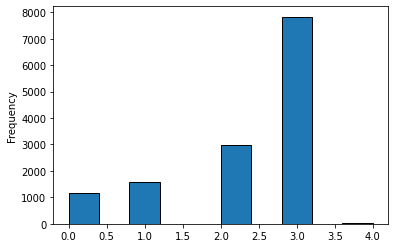

In [18]:
df_num['GarageCars'].plot(kind='hist', edgecolor='black')

In [19]:
df_num_GarageCars = pd.cut(x      = df_num['GarageCars'],
                  bins   = [1, 2, 3, 4, 5],
                  labels = ['petit', 'moyen', 'moyen+', 'grand'])


pd.crosstab(df_num['SalePrice_label'], df_num_GarageCars)

GarageCars,petit,moyen,moyen+
SalePrice_label,,,
2,168,24,0
3,398,12,2
4,688,22,2
5,680,120,8
6,504,344,8
7,352,592,0
8,128,768,0
9,64,832,0
10,0,1280,0


## Dichotomisation

In [20]:
df_YearBuilt_dummies = pd.get_dummies(df_num_YearBuilt, prefix='YearBuilt')

In [21]:
df_GrLivArea_dummies = pd.get_dummies(df_num_GrLivArea, prefix='GrLivArea')

In [22]:
df_LotArea_dummies = pd.get_dummies(df_num_LotArea, prefix='LotArea')

In [23]:
df_GarageCars_dummies = pd.get_dummies(df_num_GarageCars, prefix='GarageCars')

In [24]:
df_GarageCars_dummies.head()

,GarageCars_petit,GarageCars_moyen,GarageCars_moyen+,GarageCars_grand
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [25]:
df_num_prepared = df_num.join(df_YearBuilt_dummies).join(df_GrLivArea_dummies).join(df_LotArea_dummies).join(df_GarageCars_dummies)

In [26]:
df_num_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   LotArea              13550 non-null  int64
 1   YearBuilt            13550 non-null  int64
 2   GrLivArea            13550 non-null  int64
 3   GarageCars           13550 non-null  int64
 4   SalePrice_label      13550 non-null  int64
 5   YearBuilt_ancien+++  13550 non-null  uint8
 6   YearBuilt_ancien++   13550 non-null  uint8
 7   YearBuilt_ancien+    13550 non-null  uint8
 8   YearBuilt_ancien     13550 non-null  uint8
 9   YearBuilt_recent     13550 non-null  uint8
 10  YearBuilt_recent+    13550 non-null  uint8
 11  YearBuilt_recent++   13550 non-null  uint8
 12  YearBuilt_recent+++  13550 non-null  uint8
 13  YearBuilt_top        13550 non-null  uint8
 14  GrLivArea_petit      13550 non-null  uint8
 15  GrLivArea_moyen      13550 non-null  uint8
 16  GrLivArea_moyen+     1

### Evolution du modèle

In [27]:
data = df_num_prepared.iloc[:,4:]

target = df_num_prepared['SalePrice_label']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66) 

In [29]:
clf = linear_model.LogisticRegression(C = 1.0, max_iter=10000000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000000)

In [30]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[265   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 178   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 208   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1 165   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 167   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 163   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 183   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 261   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 190   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 156   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 178   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 214]]


In [31]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,1,2,3,4,5,6,7,8,9,10,11,12,13,15
Classe réelle,,,,,,,,,,,,,,
1,265,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,178,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,208,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,165,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,167,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,163,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,202,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,179,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,183,0,0,0,0,0


In [32]:
clf.score(X_test, y_test)

0.9996309963099631

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       265
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       208
           4       1.00      0.99      1.00       166
           5       1.00      1.00      1.00       167
           6       1.00      1.00      1.00       163
           7       1.00      1.00      1.00       202
           8       1.00      1.00      1.00       179
           9       1.00      1.00      1.00       183
          10       1.00      1.00      1.00       261
          11       1.00      1.00      1.00       190
          12       1.00      1.00      1.00       156
          13       1.00      1.00      1.00       178
          15       1.00      1.00      1.00       214

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710



### Courbe ROC

In [34]:
probs = clf.predict_proba(X_test)

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1) # 

roc_auc = auc(fpr, tpr)

In [36]:
from collections import Counter
Counter(y_test)

Counter({1: 265,
         12: 156,
         4: 166,
         15: 214,
         6: 163,
         2: 178,
         5: 167,
         13: 178,
         9: 183,
         10: 261,
         8: 179,
         7: 202,
         11: 190,
         3: 208})

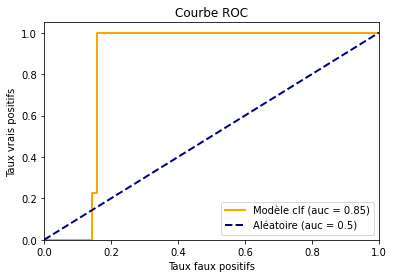

In [37]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## SVM

In [38]:
from sklearn import svm

In [39]:
clf = svm.SVC(gamma=0.01,  kernel='poly')
clf.fit(X_train, y_train)

SVC(gamma=0.01, kernel='poly')

In [40]:
clf.score(X_test, y_test)

0.8955719557195572